In [1]:
library(tidyverse)
library(ggplot2)
library(readxl)
library(dplyr)
library(tsibble)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: 'tsibble'


The following object is masked from 'package:lubridate':

    interval


The following objects are masked from 'package:base':

    intersect, setdiff, union




In [2]:
install.packages("devtools")


The downloaded binary packages are in
	/var/folders/nt/03y4p9md50gblp_0svv74zb80000gn/T//RtmpShqcfw/downloaded_packages


In [3]:
devtools::install_github('Ather-Energy/ggTimeSeries')

Using GitHub PAT from the git credential store.

Skipping install of 'ggTimeSeries' from a github remote, the SHA1 (57b60a79) has not changed since last install.
  Use `force = TRUE` to force installation



In [4]:
library(ggTimeSeries)

In [5]:
library(arrow)

# Read the Parquet file
quart_df <- read_parquet("/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/datasets/final_data_mun.parquet")


df_ts <- quart_df  %>% 
    mutate(time = yearquarter(time))



Attaching package: 'arrow'


The following object is masked from 'package:lubridate':

    duration


The following object is masked from 'package:utils':

    timestamp




In [4]:
head(df_ts)

time,concelho,hpi,hpi_log,purchases,purchases_log,ur,hpi_D1,hpi_log_D1,purchases_D1,...,Medit_factor_t2m_L5,Medit_factor_t2m_L6,Medit_factor_t2m_L7,Medit_factor_t2m_L8,Medit_factor_t2m_L9,Medit_factor_t2m_L10,Medit_factor_t2m_L11,Medit_factor_t2m_L12,CCA_2,NAME_1
<qtr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2010 Q2,abrantes,108.62397,4.687892,7566741,15.83906,0.08621749,-1.297620,-0.01187519,745550.3,...,-0.9673127,-0.4909292,0.09803482,0.7483143,1.1910111,1.24440058,0.9532942,0.4218655,1401,Santar<U+00E9>m
2010 Q3,abrantes,113.58032,4.732510,8225638,15.92220,0.08848248,4.956347,0.04461812,658897.7,...,-0.7003919,-1.1034890,-1.16607923,-0.9673127,-0.4909292,0.09803482,0.7483143,1.1910111,1401,Santar<U+00E9>m
2010 Q4,abrantes,112.12226,4.719590,8447791,15.93923,0.08404124,-1.458064,-0.01292041,222153.0,...,0.8964727,0.3803226,-0.19897080,-0.7003919,-1.1034890,-1.16607923,-0.9673127,-0.4909292,1401,Santar<U+00E9>m
2011 Q1,abrantes,105.80060,4.661556,6812685,15.73389,0.09019754,-6.321655,-0.05803365,-1635106.0,...,0.7066382,1.1882002,1.26493116,0.8964727,0.3803226,-0.19897080,-0.7003919,-1.1034890,1401,Santar<U+00E9>m
2011 Q2,abrantes,100.59489,4.611101,7459017,15.82480,0.09216437,-5.205708,-0.05045471,646331.7,...,-0.9820153,-0.5337255,0.10262963,0.7066382,1.1882002,1.26493116,0.8964727,0.3803226,1401,Santar<U+00E9>m
2011 Q3,abrantes,99.52694,4.600428,8093095,15.90597,0.09874275,-1.067955,-0.01067315,634078.0,...,-0.7697509,-1.1718565,-1.28657053,-0.9820153,-0.5337255,0.10262963,0.7066382,1.1882002,1401,Santar<U+00E9>m


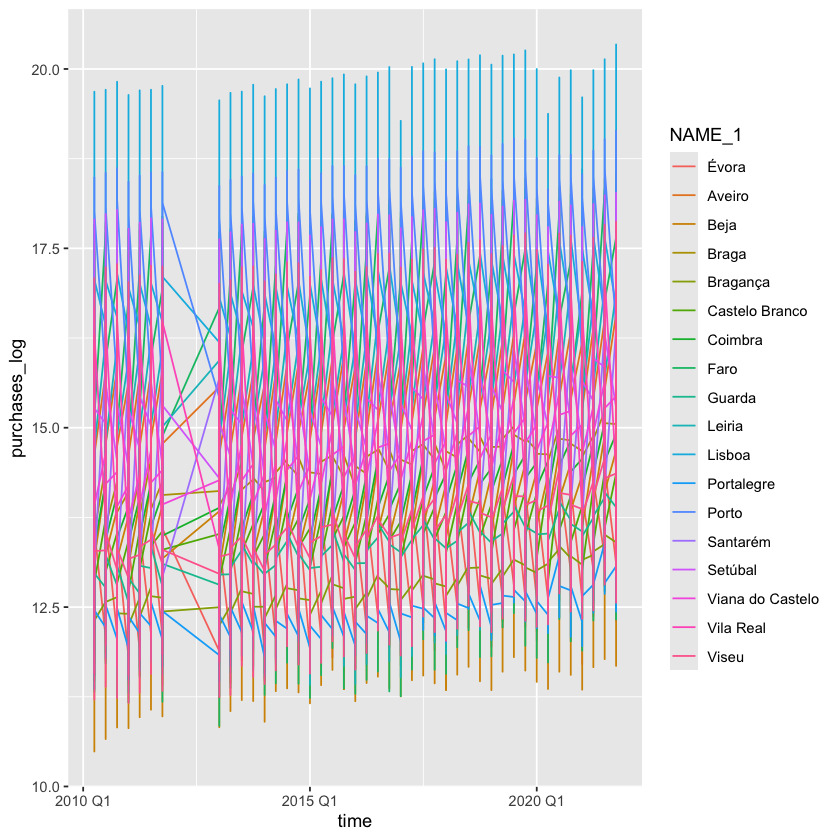

In [6]:
ggplot(df_ts, aes(x = time, y = purchases_log, colour = NAME_1)) + geom_line()
#geom_smooth(se = FALSE)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


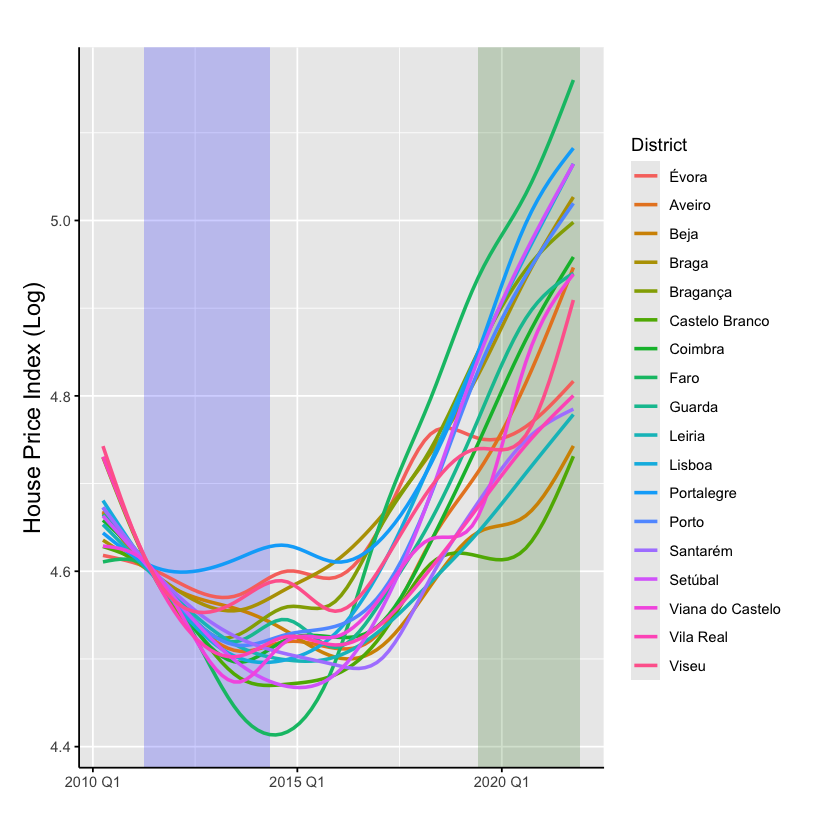

In [19]:
library(ggplot2)
library(scales) # for date formatting on x-axis

# Define a wider plot
wider_plot <- theme(plot.margin = margin(5.5, 40, 5.5, 5.5),
                    aspect.ratio = 1/3)

# Create the plot
ggplot(df_ts, aes(x = time, y = hpi_log, colour = NAME_1)) + 
           annotate("rect", xmin = as.Date("2011-04-01"), xmax = as.Date("2014-05-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#001eff", alpha = 0.2) +
            annotate("rect", xmin = as.Date("2019-06-01"), xmax = as.Date("2021-12-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#106e00", alpha = 0.2) +
  geom_smooth(se = FALSE) +
  labs(x = '', 
       y = 'House Price Index (Log)', 
       colour = 'District') +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      ) 
  #wider_plot + # Apply the wider plot theme
 # Adjust legend position if needed
  # geom_vline(xintercept = as.Date("2007-10-01"), linetype="dashed", 
  #            colour = "#000000", linewidth = 1) + 
  # geom_text(aes(x = as.Date("2007-10-01"), y = 150, label = "Great Recession"), 
  #           angle = 90, vjust = -0.5, colour = 'black') +
  # geom_vline(xintercept = as.Date("2010-10-01"), linetype="dashed", 
  #            colour = "#000000", linewidth = 1) + 
  # geom_text(aes(x = as.Date("2010-10-01"), y = 150, label = "Sovereign Debt Crisis"), 
  #           angle = 90, vjust = -0.5, nudge_y = -10, colour = 'black') +
  # geom_vline(xintercept = as.Date("2019-05-01"), linetype="dashed", 
  #            colour = "#000000", linewidth = 1) + 
  # geom_text(aes(x = as.Date("2019-05-01"), y = 175, label = "Real Estate Boom"), 
  #           angle = 90, vjust = -0.5, nudge_y = -20, colour = 'black')



ggsave(filename = 'hpi_log_highlight.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


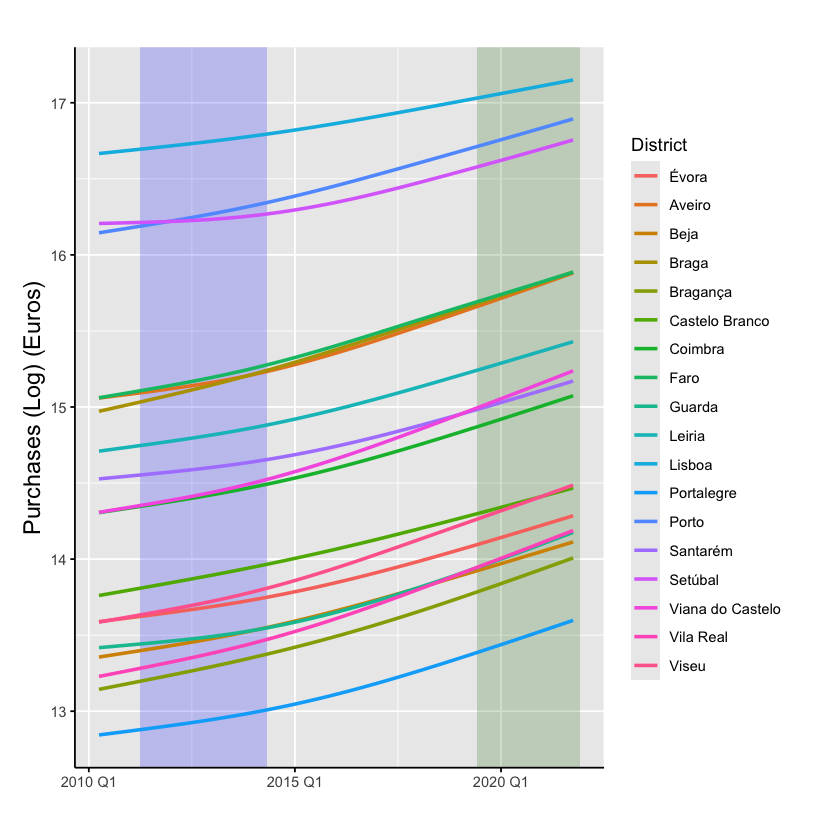

In [20]:
#ggplot(df_ts, aes(x = time, y = disp_inc_conc, colour = NAME_1))

ggplot(df_ts, aes(x = time, y = purchases_log, colour = NAME_1)) +  
           annotate("rect", xmin = as.Date("2011-04-01"), xmax = as.Date("2014-05-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#001eff", alpha = 0.2) +
            annotate("rect", xmin = as.Date("2019-06-01"), xmax = as.Date("2021-12-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#106e00", alpha = 0.2) + 
           geom_smooth(se = FALSE) +
  labs(x = "", 
       y = "Purchases (Log) (Euros)", 
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
  
ggsave(filename = 'purchases_log.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


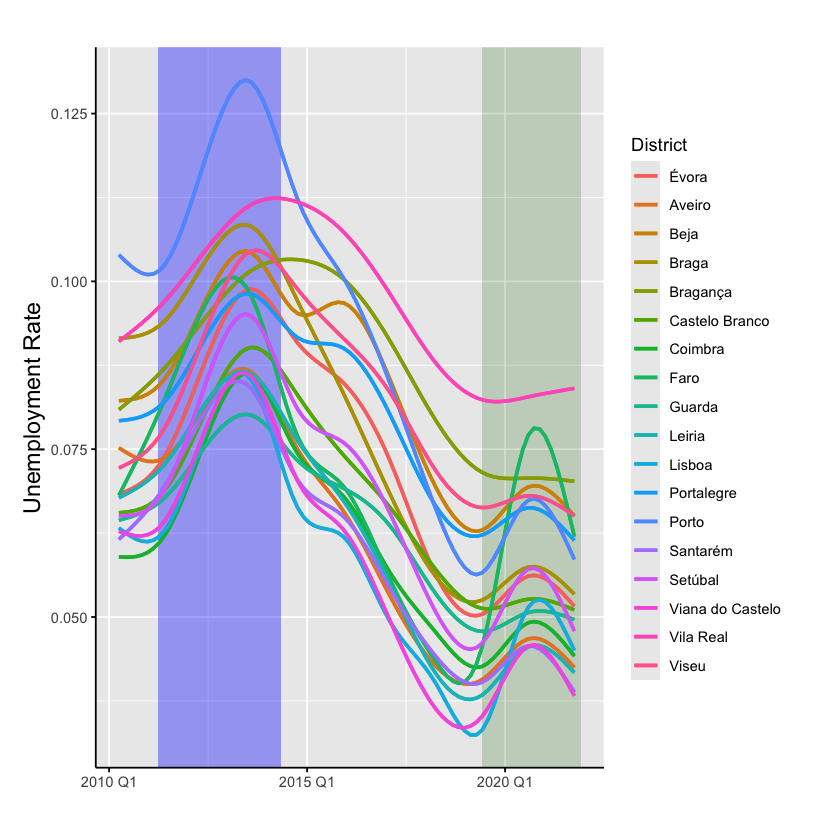

In [21]:
ggplot(df_ts, aes(x = time, y = ur, colour = NAME_1)) + 
           annotate("rect", xmin = as.Date("2011-04-01"), xmax = as.Date("2014-05-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#001eff", alpha = 0.2) +
            annotate("rect", xmin = as.Date("2019-06-01"), xmax = as.Date("2021-12-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#106e00", alpha = 0.2) + 
           geom_smooth(se = FALSE) +
           annotate("rect", xmin = as.Date("2011-04-01"), xmax = as.Date("2014-05-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#001eff", alpha = 0.2) +
geom_smooth(se = FALSE) +
  labs(x = "", 
       y = "Unemployment Rate", 
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
  
ggsave(filename = 'ur.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


Warning message in geom_line(se = FALSE):
"Ignoring unknown parameters: `se`"


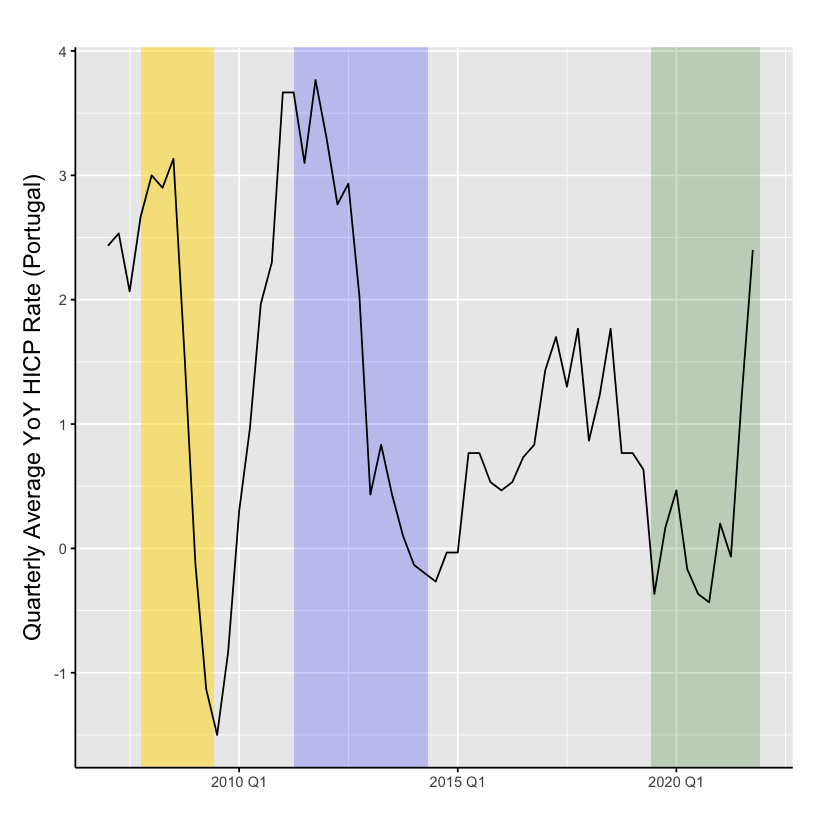

In [17]:
hicp <- df_ts %>%
  group_by(time) %>%
  summarise(hicp = mean(hicp_percentage, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(Year = as.numeric(sub(" .*", "", time)),  # Extract the year
         Quarter = as.numeric(sub(".*Q", "", time)))  # Extract the quarter
ggplot(hicp, aes(x = time, y = hicp)) +  annotate("rect", xmin = as.Date("2007-10-01"), xmax = as.Date("2009-06-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#ffd900", alpha = 0.5) +  # Adding a rectangle
           annotate("rect", xmin = as.Date("2011-04-01"), xmax = as.Date("2014-05-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#001eff", alpha = 0.2) +
            annotate("rect", xmin = as.Date("2019-06-01"), xmax = as.Date("2021-12-01"),
           ymin = -Inf, ymax = +Inf,
           color = "transparent", fill = "#106e00", alpha = 0.2) + 
# annotate("rect", xmin = as.Date("2007-10-01"), xmax = as.Date("2009-06-01"),
#            ymin = -Inf, ymax = +Inf,
#            color = "transparent", fill = "#ffd900", alpha = 0.5) +  # Adding a rectangle
#            annotate("rect", xmin = as.Date("2011-04-01"), xmax = as.Date("2014-05-01"),
#            ymin = -Inf, ymax = +Inf,
#            color = "transparent", fill = "#001eff", alpha = 0.2) +
geom_line(se = FALSE) +
  labs(x = "", 
       y = "Quarterly Average YoY HICP Rate (Portugal)") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
ggsave(filename = 'hicp_highlight.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvpandit/Mirror/University/Masters/Thesis/images/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


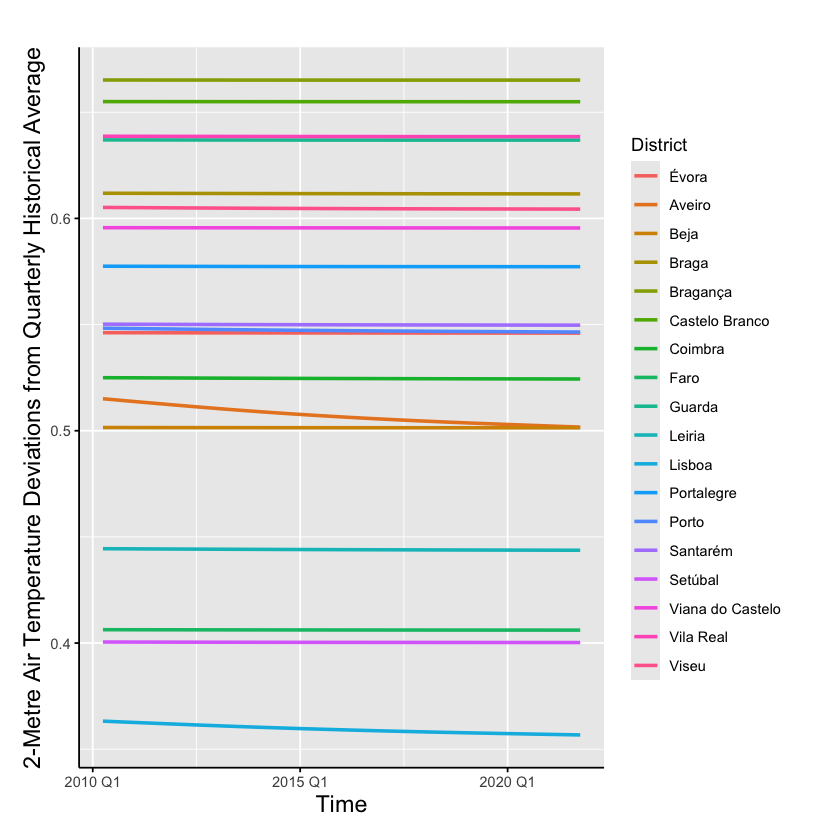

In [30]:
ggplot(df_ts, aes(x = time, y = t2m_hd, colour = NAME_1)) +
  geom_smooth(fill = "#ffffff00",se = FALSE)  +
    #geom_line() +
  labs(x = "Time", 
       y = "2-Metre Air Temperature Deviations from Quarterly Historical Average",
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
  
ggsave(filename = 't2m_hd.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


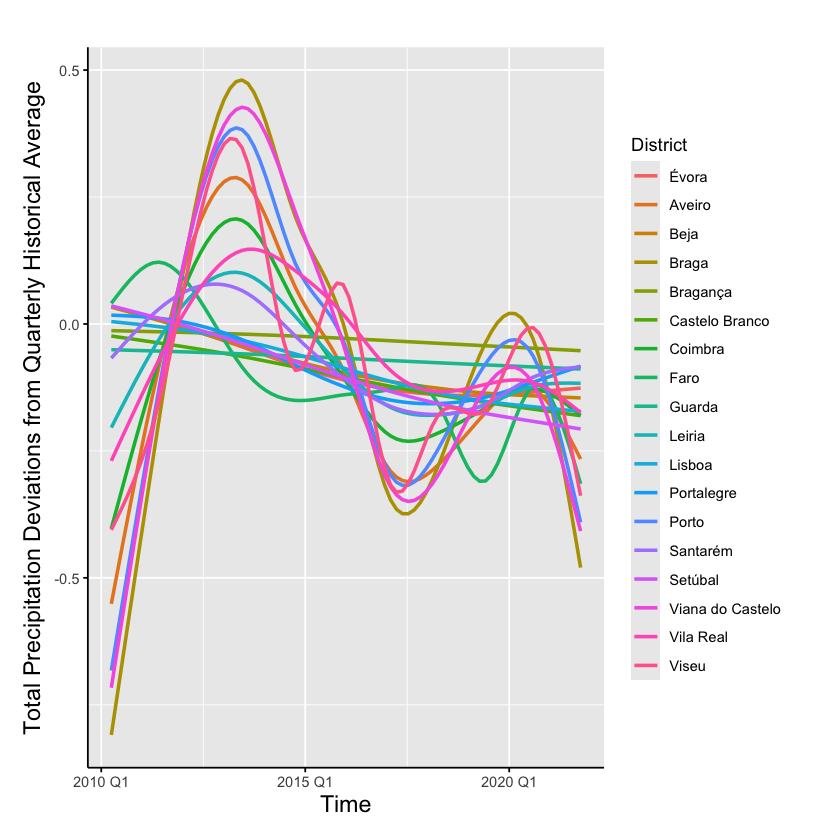

In [24]:
ggplot(df_ts, aes(x = time, y = tp_hd, colour = NAME_1)) +
  geom_smooth(fill = "#ffffff00",se = FALSE)  +
  labs(x = "Time", 
       y = "Total Precipitation Deviations from Quarterly Historical Average", 
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
ggsave(filename = 'tp_hd.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


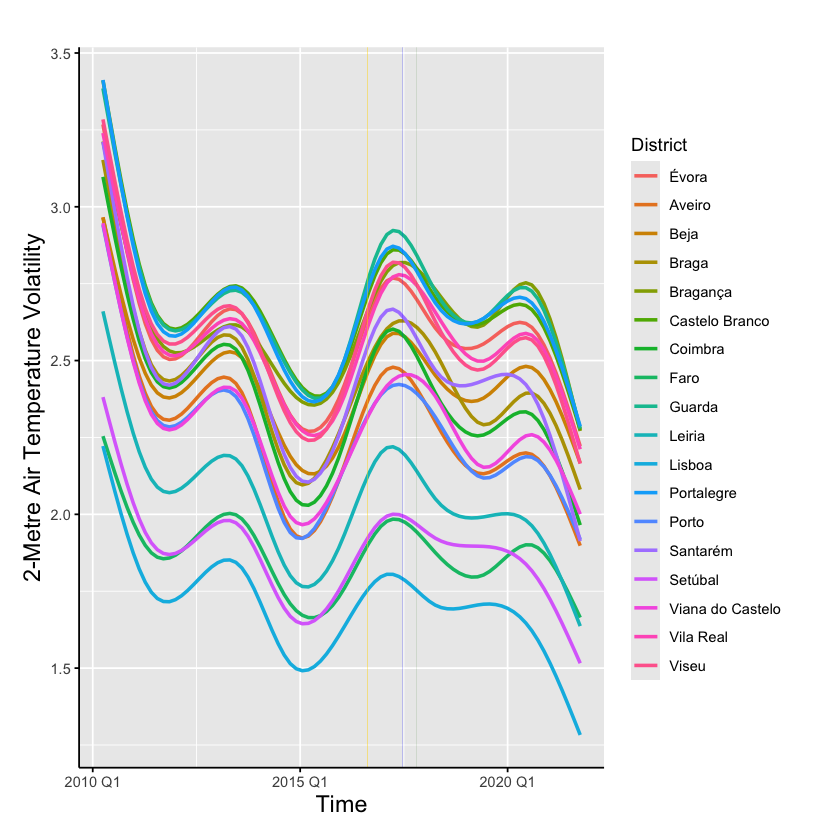

In [25]:

ggplot(df_ts, aes(x = time, y = t2m_std, colour = NAME_1)) +
  geom_smooth(fill = "#ffffff00", se = FALSE) +  # First add smooth line
  annotate("rect", xmin = as.Date("2016-08-07"), xmax = as.Date("2016-08-15"),
           ymin = -Inf, ymax = Inf,
           fill = "#ffd900", alpha = 0.5) +  # Adding rectangles after the line
  annotate("rect", xmin = as.Date("2017-06-17"), xmax = as.Date("2017-06-24"),
           ymin = -Inf, ymax = Inf,
           fill = "#001eff", alpha = 0.2) +
  annotate("rect", xmin = as.Date("2017-10-13"), xmax = as.Date("2017-10-18"),
           ymin = -Inf, ymax = Inf,
           fill = "#106e00", alpha = 0.2) +
  labs(x = "Time", y = "2-Metre Air Temperature Volatility", colour = "District") +
  theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),
        axis.ticks = element_line(color = "black"),
        plot.margin = margin(10, 10, 5, 5, "mm"))

ggsave(filename = 't2m_std.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


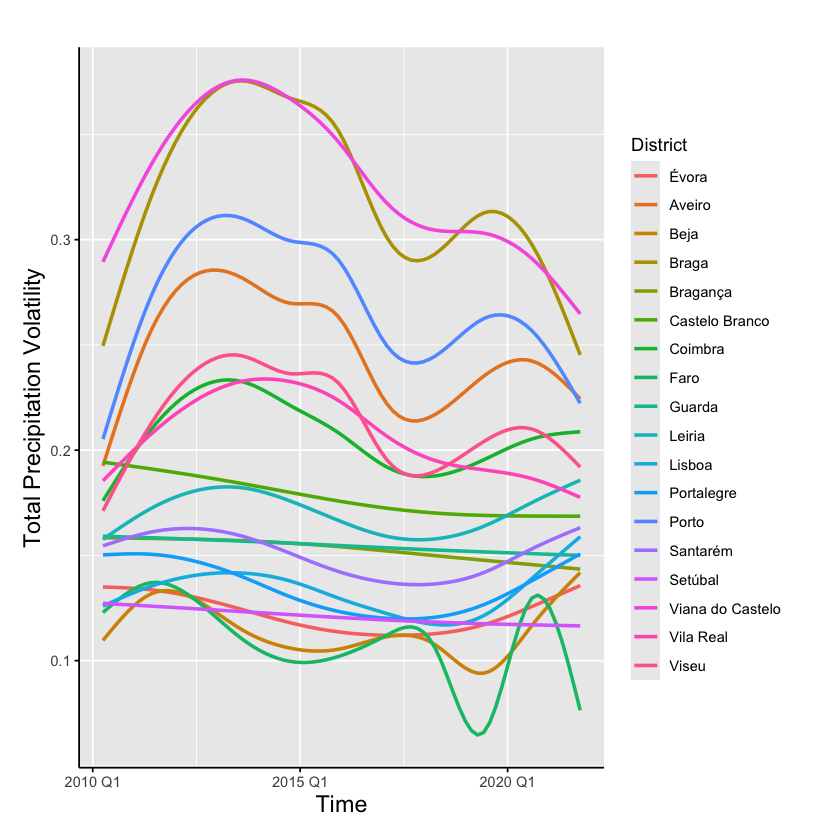

In [26]:
ggplot(df_ts, aes(x = time, y = tp_std_mm_hour, colour = NAME_1)) +
  geom_smooth(fill = "#ffffff00",se = FALSE)  +
  labs(x = "Time", 
       y = "Total Precipitation Volatility", 
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
ggsave(filename = 'tp_std.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


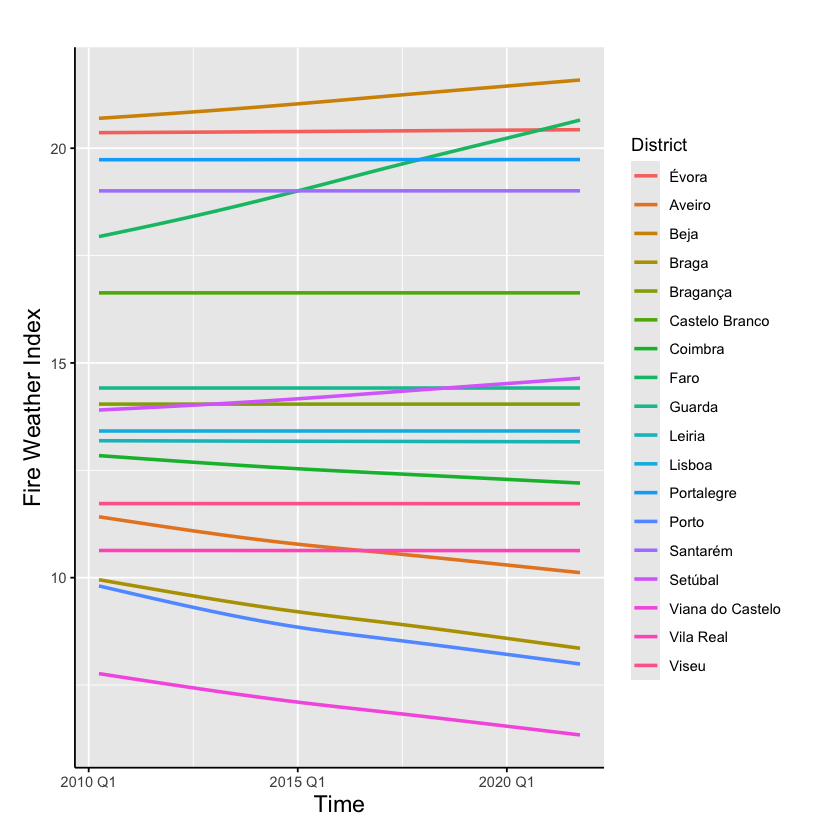

In [27]:
ggplot(df_ts, aes(x = time, y = fwi, colour = NAME_1)) +
  geom_smooth(fill = "#ffffff00",se = FALSE)  +
  labs(x = "Time", 
       y = "Fire Weather Index", 
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
ggsave(filename = 'fwi.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


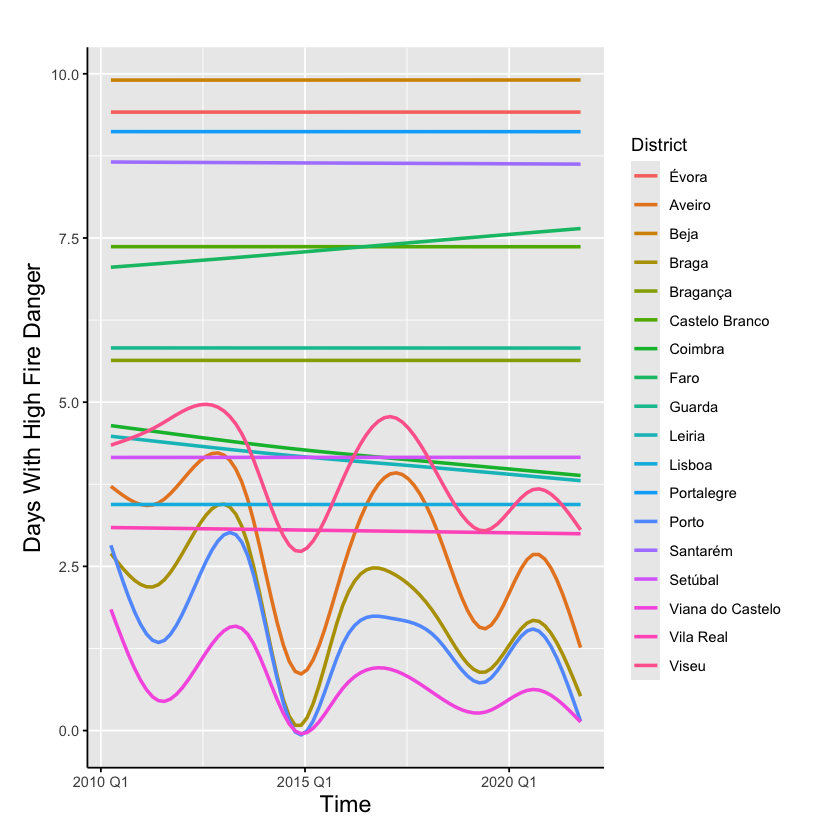

In [28]:
ggplot(df_ts, aes(x = time, y = high_fire_days, colour = NAME_1)) +
  geom_smooth(fill = "#ffffff00",se = FALSE)  +
  labs(x = "Time", 
       y = "Days With High Fire Danger", 
       colour = "District") +
     theme(legend.position = "right",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.line = element_line(color = "black"),  # Make x and y axis lines solid black
        axis.ticks = element_line(color = "black"),  # Make axis ticks black
        plot.margin = margin(10, 10, 5, 5,unit = 'mm')  # Add margins; top, right, bottom, left
      )
ggsave(filename = 'high_fire_days.png', dpi = 300, width = 2000, height = 1500,units = c('px') ,path = '/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/climate-econometrics/countries/portugal/purchases_paper/outputs/data_plots/', device = 'png')



Attaching package: 'data.table'


The following object is masked from 'package:tsibble':

    key


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




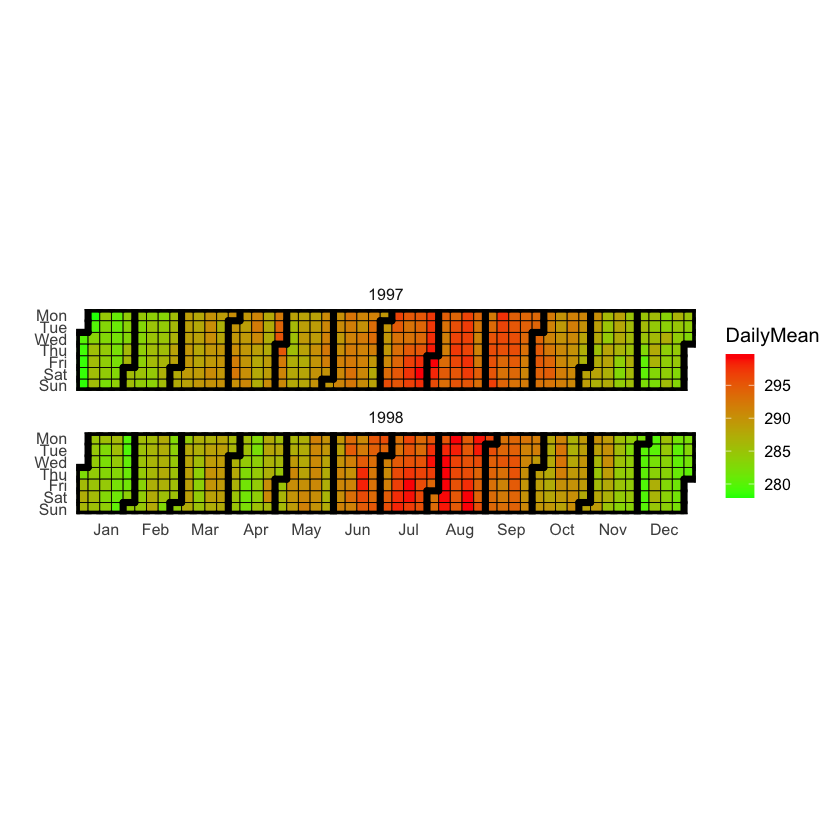

In [5]:
library(ncdf4)
library(data.table)
library(lubridate)
library(ggplot2)
library(ggTimeSeries)

# Open NetCDF file
nc <- nc_open("/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/msc-thesis/database/net_cdf_hourly/adaptor.mars.internal-1702064963.187985-3075-5-f03eea70-e8dd-44a2-8fbc-8d024f3ec811.nc")

t2m <- ncvar_get(nc, "t2m")
time_vals <- ncvar_get(nc, "time")
time_units <- ncatt_get(nc, "time", "units")$value
nc_close(nc)

# Convert time units to a POSIXct sequence
start_date_str <- sub("hours since ", "", time_units)
start_date <- as.POSIXct(start_date_str, tz = "UTC")
date_time <- start_date + lubridate::hours(time_vals)

# Average t2m across all grid cells for each time slice
mean_t2m <- apply(t2m, 3, mean, na.rm = TRUE)

# Combine into a data.table
dtHourly <- data.table(
  DateTime = date_time,
  Value = mean_t2m
)
# Convert hourly data to daily averages
dtDaily <- dtHourly[, .(DailyMean = mean(Value, na.rm = TRUE)), by = .(Date = as.Date(DateTime))]

# Create a full sequence of dates for daily data
full_dates <- data.table(Date = seq(min(dtDaily$Date), max(dtDaily$Date), by = "day"))

# Merge with the daily data to fill in missing dates
dtDaily <- merge(full_dates, dtDaily, by = "Date", all.x = TRUE)

# Replace NA values in DailyMean with a placeholder (e.g., 0 or mean of the column, if appropriate)
dtDaily[is.na(DailyMean), DailyMean := 0]

# Add a Year column for facetting
dtDaily[, Year := year(Date)]

# Plot the calendar heatmap
p <- ggplot_calendar_heatmap(
  dtDaily,
  'Date',
  'DailyMean'
) +
  scale_fill_continuous(low = 'green', high = 'red', name = 'DailyMean') +
  facet_wrap(~Year, ncol = 1) +
  xlab('') +
  ylab('') +
  theme_bw(base_size = 12) +
  theme(
    axis.ticks = element_blank(),
    legend.position = 'right',
    strip.background = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    panel.grid = element_blank()
  )

print(p)


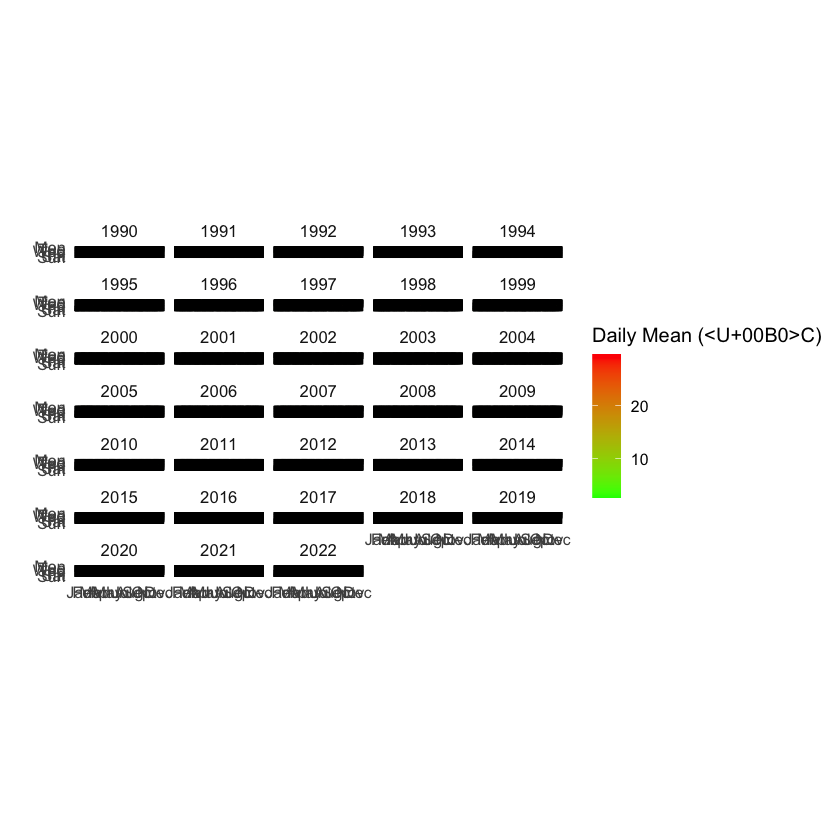

In [6]:
library(ncdf4)
library(data.table)
library(lubridate)
library(ggplot2)
library(ggTimeSeries)

# Directory containing NetCDF files
netcdf_dir <- "/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/msc-thesis/database/net_cdf_hourly/"
netcdf_files <- list.files(netcdf_dir, full.names = TRUE, pattern = "\\.nc$")

# Initialize an empty data.table to store combined data
dtHourlyAll <- data.table()

# Loop through all NetCDF files
for (file in netcdf_files) {
  # Open NetCDF file
  nc <- nc_open(file)
  
  # Extract variable and dimensions
  t2m <- ncvar_get(nc, "t2m")
  time_vals <- ncvar_get(nc, "time")
  time_units <- ncatt_get(nc, "time", "units")$value
  nc_close(nc)
  
  # Convert time units to POSIXct
  start_date_str <- sub("hours since ", "", time_units)
  start_date <- as.POSIXct(start_date_str, tz = "UTC")
  date_time <- start_date + lubridate::hours(time_vals)
  
  # Average across all grid points for each time slice
  mean_t2m <- apply(t2m, 3, mean, na.rm = TRUE)
  
  # Combine into a data.table
  dtHourly <- data.table(
    DateTime = date_time,
    Value = mean_t2m
  )
  
  # Append to the combined data.table
  dtHourlyAll <- rbind(dtHourlyAll, dtHourly)
}

# Convert hourly data to daily averages
dtDaily <- dtHourlyAll[, .(DailyMean = mean(Value, na.rm = TRUE)), by = .(Date = as.Date(DateTime))]

# Create a full sequence of dates to ensure no missing days
full_dates <- data.table(Date = seq(min(dtDaily$Date), max(dtDaily$Date), by = "day"))
dtDaily <- merge(full_dates, dtDaily, by = "Date", all.x = TRUE)

# Replace NA values in DailyMean with a placeholder (e.g., 0 or mean of the column, if appropriate)
dtDaily[is.na(DailyMean), DailyMean := 0]

# Add a Year column for facetting
dtDaily[, Year := year(Date)]
# Convert Kelvin to Celsius
dtDaily[, DailyMean := DailyMean - 273.15]

# Adjust facet layout and remove whitespace by tweaking the `theme` and plot size
p <- ggplot_calendar_heatmap(
  dtDaily,
  'Date',
  'DailyMean'
) +
  scale_fill_continuous(low = 'green', high = 'red', name = 'Daily Mean (°C)') +
  facet_wrap(~Year, ncol = 5) +  # Adjust ncol to control layout
  xlab('') +
  ylab('') +
  theme_bw(base_size = 12) +
  theme(
    axis.ticks = element_blank(),
    legend.position = 'right',
    strip.background = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    plot.margin = margin(5, 5, 5, 5),  # Minimise whitespace
    strip.text = element_text(size = 10)  # Adjust facet label size
  )
print(p)


In [18]:

# Save the plot to a file with high resolution
ggsave("/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/msc-thesis/plots_paper/calendar_heatmap_celsius.png", plot = p, width = 30, height = 20, dpi = 300, units = "in")

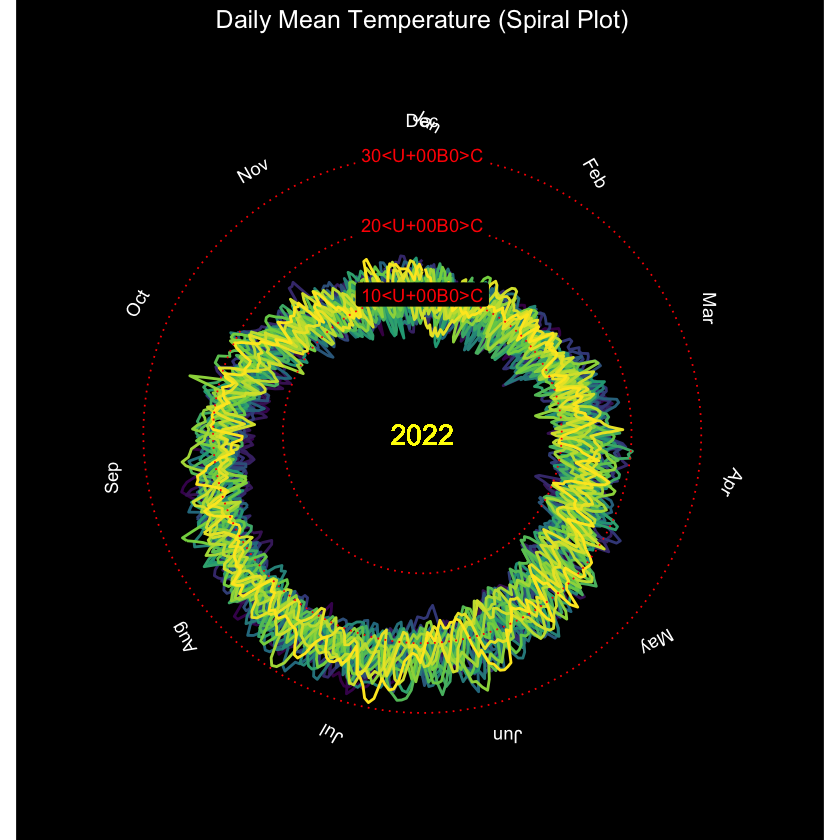

In [11]:
library(tidyverse)
library(lubridate)

# Step 1: Prepare daily data for plotting
t_data <- dtDaily %>%
  mutate(
    day_of_year = yday(Date),                # Day of the year (1 to 365/366)
    month = format(Date, "%b"),             # Month as a 3-letter abbreviation
    month_number = month(Date),             # Month as a number (1–12)
    year = year(Date)                       # Extract year
  )

# Step 2: Add annotations and gridlines
annotation <- t_data %>%
  slice_max(year) %>%
  slice_max(day_of_year)

temp_lines <- tibble(
  x = 365,  # Position for labels at the end of the year
  y = c(10, 20, 30),  # Adjust temperature levels based on your data
  labels = c("10°C", "20°C", "30°C")
)

month_labels <- tibble(
  x = seq(1, 365, length.out = 12),  # Approximate positions for months
  labels = month.abb,
  y = 35  # Adjust to position labels outside the plot
)

# Step 3: Create the spiral plot
t_data %>%
  ggplot(aes(x = day_of_year, y = DailyMean, group = year, color = year)) +
  geom_line(size = 0.8) +  # Plot daily values for each year
  geom_hline(yintercept = c(10, 20, 30), color = "red", linetype = "dotted") +
  geom_label(data = temp_lines, aes(x = x, y = y, label = labels),
             color = "red", fill = "black", label.size = 0, inherit.aes = FALSE) +
  geom_text(data = month_labels, aes(x = x, y = y, label = labels),
            inherit.aes = FALSE, color = "white",
            angle = seq(360 - 360 / 12, 0, length.out = 12)) +
  geom_text(aes(x = 1, y = -10, label = max(year)), size = 6, color = "yellow") +
  scale_x_continuous(
    breaks = seq(1, 365, length.out = 12),  # Month positions
    labels = NULL, expand = c(0, 0)
  ) +
  scale_y_continuous(
    breaks = seq(0, 35, 5),  # Adjust to match your temperature range
    limits = c(-10, 35), expand = c(0, 0)
  ) +
  scale_color_viridis_c(
    breaks = seq(min(t_data$year), max(t_data$year), 5),
    guide = "none"
  ) +
  coord_polar(start = 2 * pi / 365) +
  labs(
    x = NULL,
    y = NULL,
    title = "Daily Mean Temperature (Spiral Plot)"
  ) +
  theme(
    panel.background = element_rect(fill = "black"),
    plot.background = element_rect(fill = "black", color = "black"),
    panel.grid = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    plot.title = element_text(color = "white", hjust = 0.5, size = 15)
  )
ggsave("/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/msc-thesis/plots_paper/spiral.png", width = 30, height = 20, dpi = 300, units = "in")

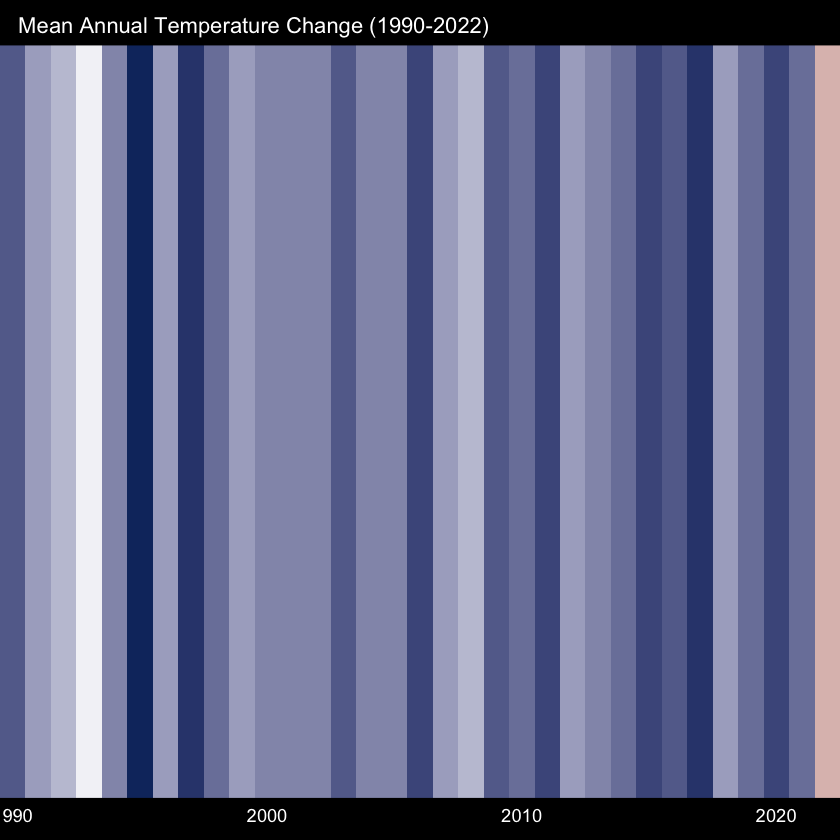

In [10]:
library(tidyverse)
library(scales)
library(glue)

# Step 1: Aggregate daily data to yearly means
t_data <- dtDaily %>%
  mutate(year = year(Date)) %>%              # Extract year
  group_by(year) %>%                         # Group by year
  summarise(t_diff = mean(DailyMean, na.rm = TRUE)) %>% # Calculate yearly mean
  drop_na()

# Step 2: Create warming stripes plot
t_data %>%
  ggplot(aes(x = year, y = 1, fill = t_diff)) +
  geom_tile(show.legend = FALSE) +  # Draw the "stripes"
  scale_fill_stepsn(
    colors = c("#08306B", "white", "#67000D"),  # Blue to red palette
    values = rescale(c(min(t_data$t_diff), 0, max(t_data$t_diff))),  # Normalised values
    n.breaks = 12  # Adjust for more gradient steps
  ) +
  coord_cartesian(expand = FALSE) +
  scale_x_continuous(breaks = seq(min(t_data$year), max(t_data$year), 10)) +  # Decade ticks
  labs(
    title = glue("Mean Annual Temperature Change ({min(t_data$year)}-{max(t_data$year)})")
  ) +
  theme_void() +
  theme(
    axis.text.x = element_text(
      color = "white",
      margin = margin(t = 5, b = 10, unit = "pt")
    ),
    plot.title = element_text(
      color = "white",
      margin = margin(b = 5, t = 10, unit = "pt"),
      hjust = 0.05
    ),
    plot.background = element_rect(fill = "black")
  )
ggsave("/Users/dhruvnovaims/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/msc-thesis/plots_paper/lines.png", width = 30, height = 20, dpi = 300, units = "in")